In [1]:
import sys
import numpy as np
from matplotlib import pyplot as plt
import os

In [2]:
def calc_sublattice(lattice):
    c_sum = 0

    for i in range(lattice.shape[0]):
        for j in range(lattice.shape[1]):
            c_sum += np.exp(2j*np.pi/lattice.shape[0]*i)*lattice[i,j]
    
    return c_sum

In [29]:
for i in range(YSL):
    print(np.exp(2j*np.pi/YSL*i))

(1+0j)
(0.9987954562051724+0.049067674327418015j)
(0.9951847266721969+0.0980171403295606j)
(0.989176509964781+0.14673047445536175j)
(0.9807852804032304+0.19509032201612825j)
(0.970031253194544+0.24298017990326387j)
(0.9569403357322088+0.29028467725446233j)
(0.9415440651830208+0.33688985339222005j)
(0.9238795325112867+0.3826834323650898j)
(0.9039892931234433+0.4275550934302821j)
(0.881921264348355+0.47139673682599764j)
(0.8577286100002721+0.5141027441932217j)
(0.8314696123025452+0.5555702330196022j)
(0.8032075314806449+0.5956993044924334j)
(0.773010453362737+0.6343932841636455j)
(0.7409511253549591+0.6715589548470183j)
(0.7071067811865476+0.7071067811865475j)
(0.6715589548470183+0.7409511253549591j)
(0.6343932841636455+0.773010453362737j)
(0.5956993044924335+0.8032075314806448j)
(0.5555702330196023+0.8314696123025452j)
(0.5141027441932217+0.8577286100002721j)
(0.4713967368259978+0.8819212643483549j)
(0.4275550934302822+0.9039892931234433j)
(0.38268343236508984+0.9238795325112867j)
(0.33

In [24]:
X = 512
Y = 512

XSL = 128
YSL = 128

NSLX = int(X/XSL)
NSLY = int(Y/YSL)

In [25]:
data = []

f=open(f"lattices/lattice_{Y}x{X}_T_0.000000_IT_10000000_0.txt")

for l in f:
    data.append([int(c) for c in l.strip(" \n\r")])

data = np.array(data)

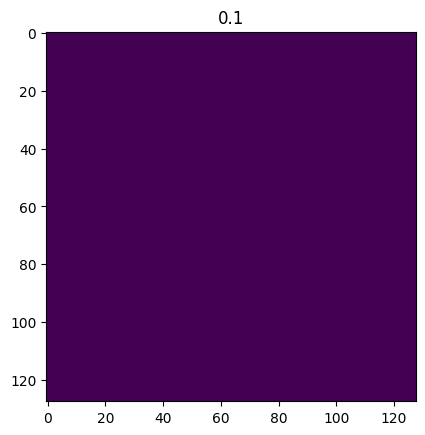

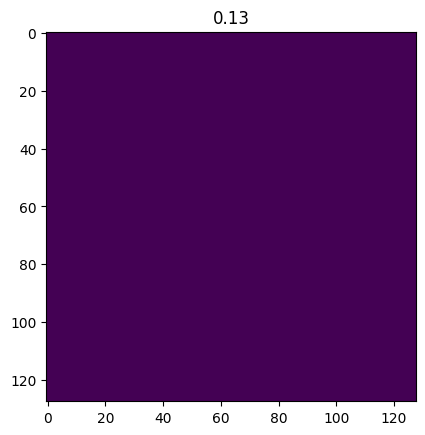

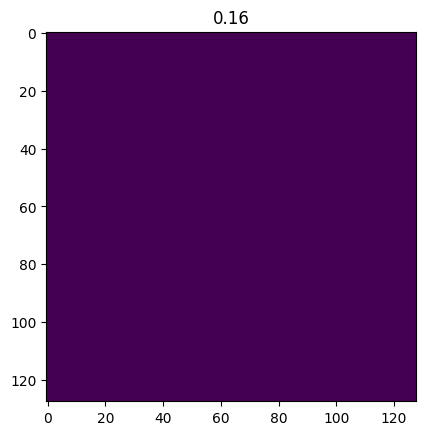

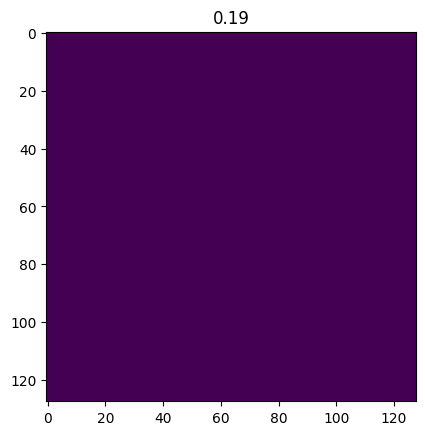

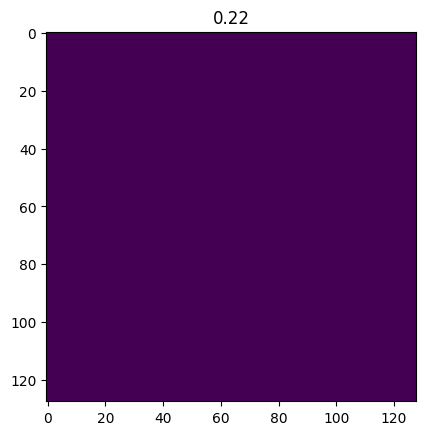

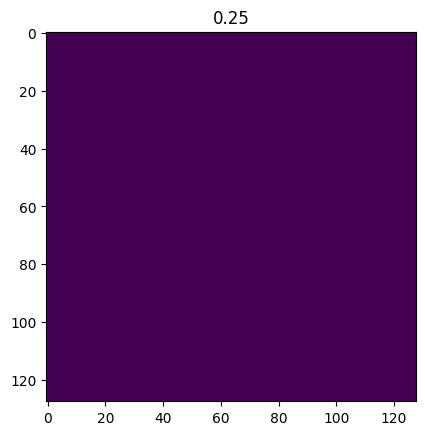

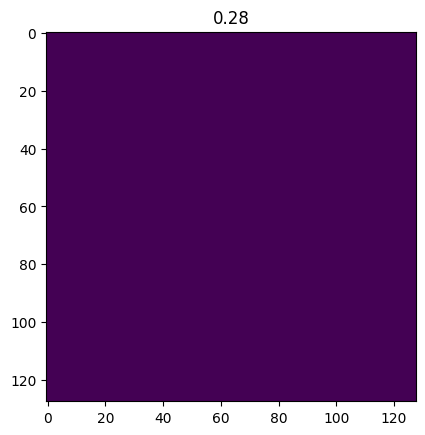

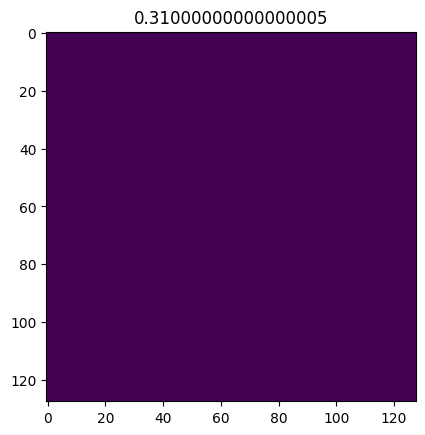

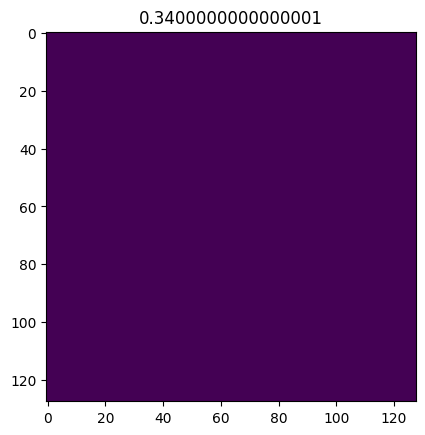

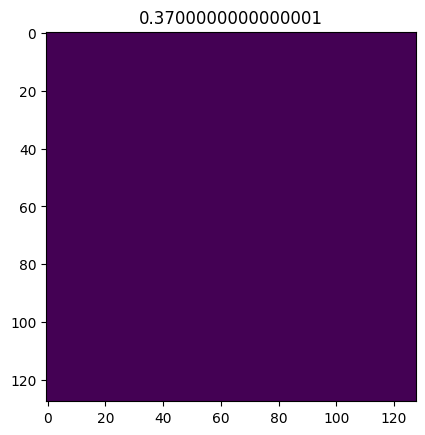

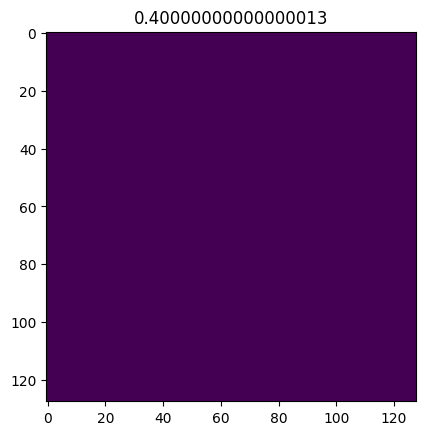

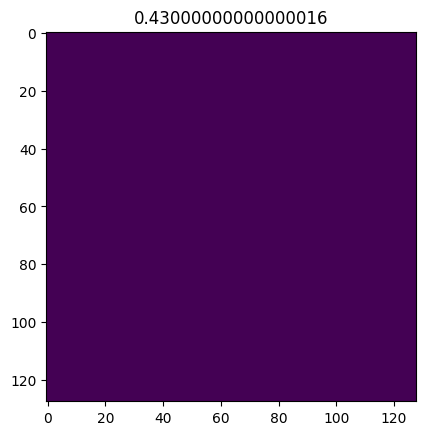

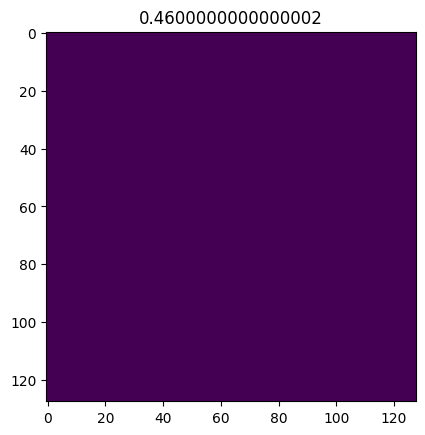

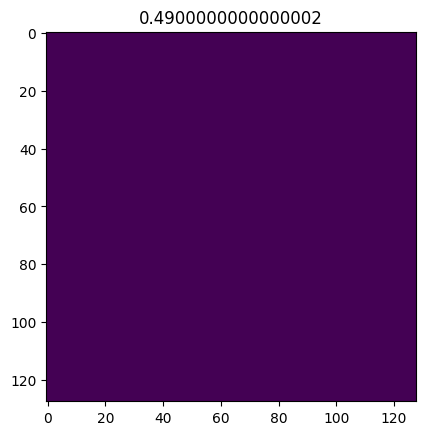

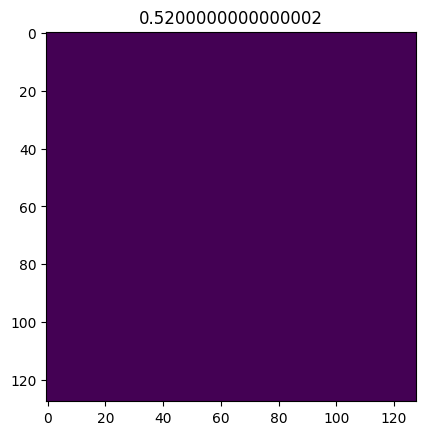

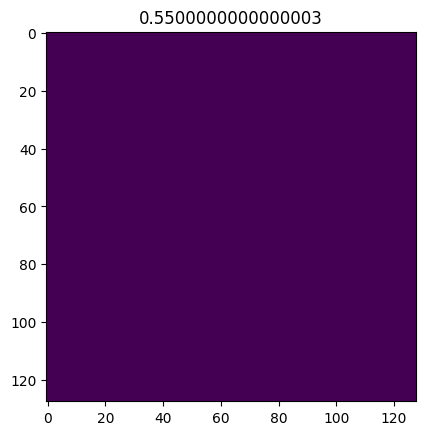

In [26]:
temp = 0.1

for j in range(NSLY):
    for i in range(NSLX):
        sublattice = data[j*YSL:(j+1)*YSL, i*XSL:(i+1)*XSL]
        plt.figure()
        plt.title(str(temp))
        plt.imshow(sublattice)
        temp += 0.03

In [27]:
data

array([[0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       ...,
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0],
       [0, 0, 0, ..., 0, 0, 0]])

In [29]:
h_sum = np.zeros((NSLX,NSLY))
c_sum = np.zeros((NSLX,NSLY),dtype = 'complex_')

for i in range(0,2,1):
    data = []
    
    f=open(f"lattices/lattice_{i}_{Y}x{X}_T_1.000000_IT_00000002_0.txt")
    
    for l in f:
        data.append([int(c) for c in l.strip(" \n\r")])
        
    data = np.array(data)
    
    data[data == 0] = -1
    
    for j in range(NSLY):
        for i in range(NSLX):
            sublattice = data[j*YSL:(j+1)*YSL, i*XSL:(i+1)*XSL]
            h_sum[j,i] += np.abs(np.sum(sublattice))**2
            c_sum[j,i] += np.abs(calc_sublattice(sublattice))**2

In [30]:
h_sum

array([[3.25337652e+08, 3.28234000e+08, 3.31273604e+08, 3.14091572e+08],
       [3.25291040e+08, 3.23678480e+08, 3.23634152e+08, 3.17466752e+08],
       [3.19603556e+08, 2.99848772e+08, 2.88130000e+08, 2.91162320e+08],
       [2.98142352e+08, 2.87393408e+08, 2.78733032e+08, 2.65849876e+08]])

In [31]:
np.abs(c_sum)

array([[326478.51025325, 125309.08732082, 248576.15368066,
        586161.93691875],
       [382925.21427049, 150415.59374263, 418364.43272643,
        156322.78372601],
       [348450.38679061, 130097.78571536, 116218.80801139,
        144684.78748303],
       [158294.51818296, 353819.5024392 , 204631.68645866,
        243440.9217641 ]])

In [31]:
c_sum = []
h_sum = []
c_sum_abs = []

for j in range(NSLY):
    for i in range(NSLX):
        sublattice = data[j*YSL:(j+1)*YSL, i*XSL:(i+1)*XSL]
        #h_sum.append(np.sum(sublattice))
        c_sum.append(calc_sublattice(sublattice))
        
for i in range(NSLX*NSLY):
    #print(h_sum[i]**2)
    c_sum_abs.append(np.abs(c_sum[i])**2)

In [23]:
1.80472356e+08 + 1.44865296e+08

325337652.0

In [12]:
# Device Reduce
dev_red = [274118.656250,
96018.812500,
55086.890625,
27145.669922,
972.217773,
62591.363281,
1456.373901,
71580.039062,
32981.820312,
46857.429688,
26779.263672,
15152.409180,
5313.246582,
47466.042969,
59494.808594,
24400.164062,
44471.406250,
141138.718750,
149758.703125,
55575.941406,
79248.679688,
41305.445312,
62714.636719,
1080.498291,
57327.796875,
16826.839844,
95231.289062,
98523.414062,
167569.281250,
59649.832031,
54897.808594,
21541.671875,
2676.539795,
85305.226562,
44609.488281,
134130.296875,
53504.351562,
42898.578125,
17765.701172,
67146.921875,
12049.443359,
27552.576172,
51450.062500,
227914.250000,
69080.101562,
79903.492188,
147447.921875,
61504.445312,
1286.969360,
40801.824219,
70047.859375,
82959.820312,
171646.625000,
94686.812500,
94894.773438,
57895.222656,
88896.710938,
39652.375000,
78343.968750,
22374.529297,
28618.611328,
94,80.013672,
31574.703125,
9360.308594]

In [20]:
inc_sum = [274118.656250,
96018.789062,
55086.902344,
27145.673828,
972.219543,
62591.347656,
1456.373901,
71580.023438,
32981.843750,
46857.417969,
26779.267578,
15152.411133,
5313.245605,
47466.042969,
59494.812500,
24400.164062,
44471.394531,
141138.687500,
149758.656250,
55575.917969,
79248.656250,
41305.437500,
62714.660156,
1080.499023,
57327.765625,
16826.843750,
95231.304688,
98523.414062,
167569.218750,
59649.832031,
54897.769531,
21541.667969,
2676.540283,
85305.226562,
44609.480469,
134130.359375,
53504.351562,
42898.589844,
17765.693359,
67146.890625,
12049.443359,
27552.585938,
51450.062500,
227914.343750,
69080.054688,
79903.476562,
147447.937500,
61504.429688,
1286.969604,
40801.816406,
70047.859375,
82959.820312,
171646.656250,
94686.812500,
94894.757812,
57895.257812,
88896.710938,
39652.371094,
78343.992188,
22374.523438,
28618.617188,
9480.015625,
31574.691406,
9360.311523]

In [22]:
error_dev = []
error_inc = []

for i in range(len(dev_red)):
    error_dev.append((dev_red[i]-c_sum_abs[i])/c_sum_abs[i])
    error_inc.append((inc_sum[i]-c_sum_abs[i])/c_sum_abs[i])

In [23]:
np.max(np.abs(error))

7.618225520575502e-07

In [18]:
Time taken: 0.021388 seconds

SyntaxError: invalid syntax (293487799.py, line 1)

In [21]:
inc_sum - dev_red

TypeError: unsupported operand type(s) for -: 'list' and 'list'

In [13]:
exp = np.zeros([128,2,5])

In [14]:
temp = [1 + i*0.1 for i in range(128)]

In [18]:
for k in range(128):
    for i in range(2):
        for j in range(5):
            if i!=0:
                exp[k,i,j]= np.exp(-2*(j*2-4)*(1/temp[k]))
            else:
                exp[k,i,j]= np.exp(2*(j*2-4)*(1/temp[k]))

In [21]:
exp[1,1,:]

array([1.44047367e+03, 3.79535725e+01, 1.00000000e+00, 2.63479808e-02,
       6.94216093e-04])

In [23]:
exp[2*8+6,0,:]

array([ 0.082085  ,  0.2865048 ,  1.        ,  3.49034296, 12.18249396])